## E&M: Standards Poisson 1 & 2

V at bottom plate (z=-1.2857142857142858): 0.714 V
V at top plate (z=1.2857142857142856): 9.286 V

There is a slight error in potential values at the top and bottom plates. 
I believe this is due to the error in indexing as you can see that the z positions are also slightly off.


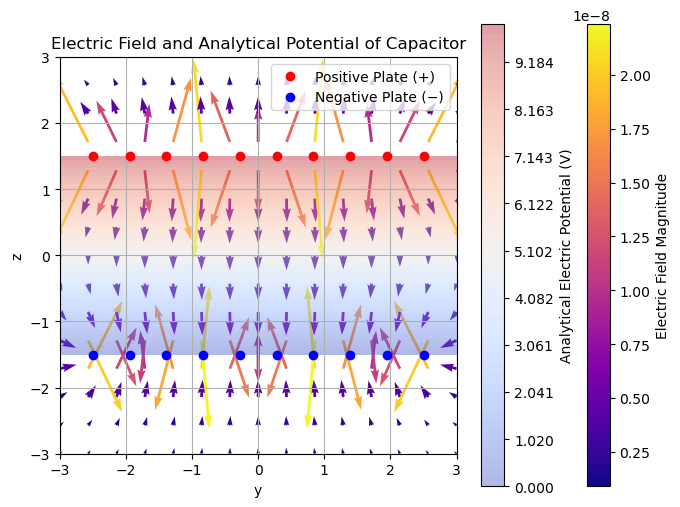

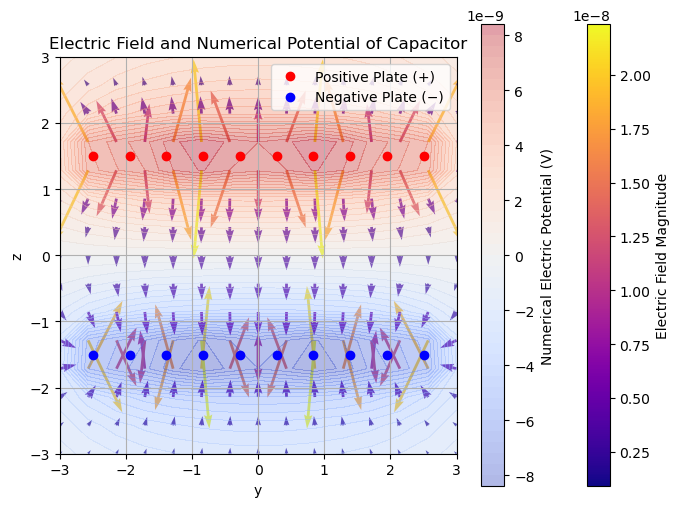

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# constant & parameters
k = 9.0E9 # rounded columbs constant
plate_len = 5 
plate_sep = 3 
num_charge = 10
q = 1.0E-19 # mag charge for each point 
x_fixed = 0.0 

############################## Make Plates ###################################

# plate charge location
y_plate = np.linspace(-plate_len / 2, plate_len / 2, num_charge)

# plate 1 (top, +q)
charge_top = [(x_fixed, y, plate_sep / 2, +q) for y in y_plate]

# plate 2 (bottom, -q)
charge_bot = [(x_fixed, y,  -plate_sep / 2, -q) for y in y_plate]

# combine charges
charges = charge_top + charge_bot

########################### Find Electric Field #################################

# grid for electric field vector
y_vals = np.linspace(-3, 3, 15)
z_vals = np.linspace(-3, 3, 15)
Y, Z = np.meshgrid(y_vals, z_vals)

# initialize field components
Ey = np.zeros_like(Y)
Ez = np.zeros_like(Z)

# function to compute electric field from a point charge
def E_field_yz(q, xq, yq, zq, y, z):
    dx = x_fixed - xq
    dy = y - yq
    dz = z - zq
    r_squared = dx**2 + dy**2 + dz**2 + 1e-10  # small term to prevent division by zero
    r = np.sqrt(r_squared)
    E_mag = k * q / r_squared  # magnitude 
    return E_mag * dy / r, E_mag * dz / r  # components

# sum E fields from all point charges
for xq, yq, zq, q in charges:
    dEy, dEz = E_field_yz(q, xq, yq, zq, Y, Z)
    Ey += dEy
    Ez += dEz
    
# compute E_mag again with componets for quiver
E_mag_quiver = np.sqrt(Ey**2 + Ez**2) 

########################### Numerically Find Electric Potenital #################################

# initialize numerical potential grid
V_potential_num = np.zeros_like(Y)

# function to numerically compute electric potential from a point charge
def V_point_charge(q, xq, yq, zq, y, z):
    dx = x_fixed - xq
    dy = y - yq
    dz = z - zq
    r = np.sqrt(dx**2 + dy**2 + dz**2 + 1e-10)  # small term to prevent division by zero
    return k * q / r

# Sum scalar potentials from all point charges
for xq, yq, zq, q in charges:
    V_potential_num += V_point_charge(q, xq, yq, zq, Y, Z)

########################### Analytically Find Electric Potenital #################################

# analytically calculate electric potential with boundary conditions V=V0 at 
V0 = 10  # chosen initial potential value, volts

z_top = +plate_sep / 2
z_bot = -plate_sep / 2

V_potential_ana = (V0 / (z_top - z_bot)) * (Z - z_bot)

# mask potential outside the plate region
V_potential_ana = np.where((Z >= z_bot - 1) & (Z <= z_top + 1 ), V_potential_ana, np.nan)

# index where z = z_bot and z = z_top to check potential values
i_bot = np.argmin(np.abs(z_vals - z_bot))
i_top = np.argmin(np.abs(z_vals - z_top))
j_center = len(y_vals) // 2

print(f"V at bottom plate (z={z_vals[i_bot]}): {V_potential_ana[i_bot, j_center]:.3f} V")
print(f"V at top plate (z={z_vals[i_top]}): {V_potential_ana[i_top, j_center]:.3f} V")
print("\nThere is a slight error in potential values at the top and bottom plates. \nI believe this is due to the error in indexing as you can see that the z positions are also slightly off.")

########################### Make Plot 1: E-field and analytical potential #################################

# setup plates
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot( y_plate , [plate_sep / 2] * num_charge, 'ro', label='Positive Plate (+)') # draw top plate 
ax.plot( y_plate, [-plate_sep / 2] * num_charge, 'bo', label='Negative Plate (−)') # draw bottom plate

# plot E-field 
quiver = ax.quiver(Y, Z, Ey, Ez, E_mag_quiver, cmap='plasma', scale=1E-7, width=0.007)
cbar = fig.colorbar(quiver, ax=ax)
cbar.set_label('Electric Field Magnitude')

# plot analytical electric potential contour map
contour1 = ax.contourf(Y, Z, V_potential_ana, levels=np.linspace(0, V0, 50) , cmap='coolwarm', alpha=0.4)
cbar1 = fig.colorbar(contour1, ax=ax, label='Analytical Electric Potential (V)')

ax.set_title("Electric Field and Analytical Potential of Capacitor")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.show()

########################### Make Plot 2: E-field and numerical potential #################################

# set up plates
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot( y_plate , [plate_sep / 2] * num_charge, 'ro', label='Positive Plate (+)') # draw top plate 
ax.plot( y_plate, [-plate_sep / 2] * num_charge, 'bo', label='Negative Plate (−)') # draw bottom plate

# plot E-field 
quiver = ax.quiver(Y, Z, Ey, Ez, E_mag_quiver, cmap='plasma', scale=1E-7, width=0.007)
cbar = fig.colorbar(quiver, ax=ax)
cbar.set_label('Electric Field Magnitude')

# plot numerical electric potential contour map
contour2 = ax.contourf(Y, Z, V_potential_num, levels=50, cmap='coolwarm', alpha=0.4)
cbar2 = fig.colorbar(contour2, ax=ax, label='Numerical Electric Potential (V)')

ax.set_title("Electric Field and Numerical Potential of Capacitor")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.show()